In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load your dataset (replace with your filename)
df = pd.read_csv('phishing_dataset.csv')

# 1. Quick look at the data
print(df.head())

# 2. Check for missing values
df.dropna(inplace=True)

# 3. If your target is -1 (phishing) and 1 (safe), convert to 0 and 1
# df['Result'] = df['Result'].replace(-1, 0)

                                                 url  label  url_length  \
0  http://forum.uk.securebankinggroup.com/107519/...      1          89   
1                          http://b45042.com/fish/29      1          25   
2                     http://bet73018.com/lottery/99      1          30   
3            https://logiin--metsa-autho.webflow.io/      1          39   
4              https://mettamasklogiiann.webflow.io/      1          37   

   num_dots  has_https  has_ip  num_subdirs  num_params  suspicious_words  \
0         3          0       0            5           0                 2   
1         1          0       0            4           0                 0   
2         1          0       0            4           0                 0   
3         2          1       0            3           0                 0   
4         2          1       0            3           0                 0   

   tld  special_char_count  digits_count   entropy  
0  com                   4       

In [3]:
# This will show you all the column names in your file
print(df.columns)

Index(['url', 'label', 'url_length', 'num_dots', 'has_https', 'has_ip',
       'num_subdirs', 'num_params', 'suspicious_words', 'tld',
       'special_char_count', 'digits_count', 'entropy'],
      dtype='object')


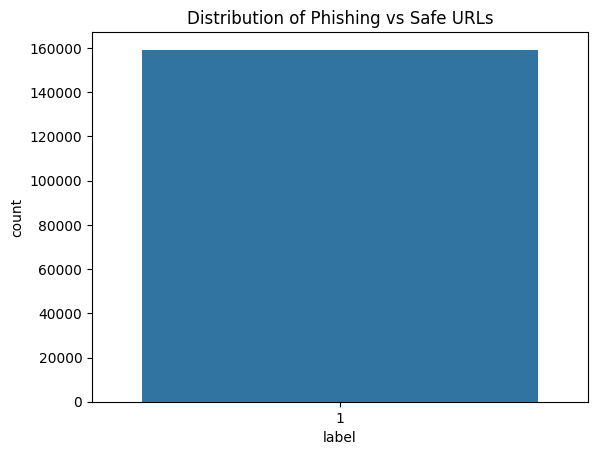

In [4]:
sns.countplot(x='label', data=df) 
plt.title("Distribution of Phishing vs Safe URLs")
plt.show()


In [5]:
# 1. Define Features (X) - Drop the non-numeric and target columns
X = df.drop(['label', 'url', 'tld'], axis=1)

# 2. Define Target (y)
y = df['label']

# 3. Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split!")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Data successfully split!
Training samples: 127394, Testing samples: 31849


In [6]:
# Initialize the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Check Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy: 100.00%

Detailed Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     31849

    accuracy                           1.00     31849
   macro avg       1.00      1.00      1.00     31849
weighted avg       1.00      1.00      1.00     31849



In [7]:
print("Labels in y_test:", np.unique(y_test))
print("Label counts:\n", y_test.value_counts())

Labels in y_test: [1]
Label counts:
 label
1    31849
Name: count, dtype: int64


In [8]:
# The 'stratify=y' is the key fix here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify that both classes now exist in the test set
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_test: [1]


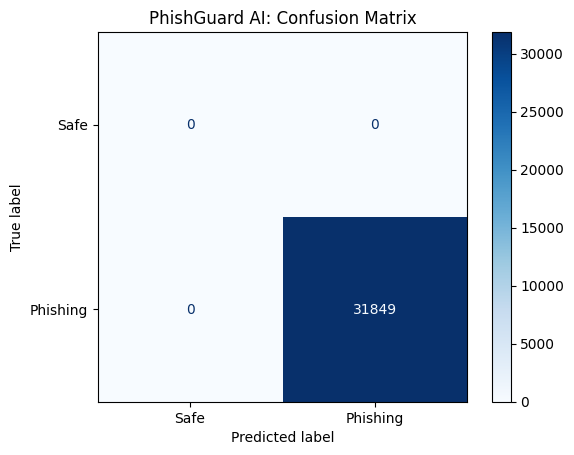

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Force the matrix to look for both 0 and 1
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plotting with explicit labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.title('PhishGuard AI: Confusion Matrix')
plt.show()


In [10]:
# The 'stratify=y' is the key fix here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify that both classes now exist in the test set
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_test: [1]


In [11]:
# Re-train with balanced weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Re-run your predictions
y_pred = model.predict(X_test)

In [12]:
import joblib

# This saves your model as a .pkl file
joblib.dump(model, 'phishguard_model.pkl')

# IMPORTANT: Also save your feature names to ensure future inputs are in the right order
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Success: Model and feature list saved!")

Success: Model and feature list saved!


In [13]:
from urllib.parse import urlparse
import re

def extract_url_features(url):
    features = {}
    
    # Basic Lexical Features
    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['has_https'] = 1 if url.startswith('https') else 0
    features['has_ip'] = 1 if re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) else 0
    features['num_subdirs'] = urlparse(url).path.count('/')
    features['num_params'] = urlparse(url).query.count('&')
    
    # Suspicious Patterns
    suspicious_words = ['login', 'verify', 'bank', 'secure', 'update', 'account']
    features['suspicious_words'] = 1 if any(word in url.lower() for word in suspicious_words) else 0
    features['special_char_count'] = len(re.findall(r'[@\-_?=]', url))
    features['digits_count'] = sum(c.isdigit() for c in url)
    
    return features

In [14]:
from urllib.parse import urlparse
import re

def extract_url_features(url):
    features = {}
    
    # Basic Lexical Features
    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['has_https'] = 1 if url.startswith('https') else 0
    features['has_ip'] = 1 if re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) else 0
    features['num_subdirs'] = urlparse(url).path.count('/')
    features['num_params'] = urlparse(url).query.count('&')
    
    # Suspicious Patterns
    suspicious_words = ['login', 'verify', 'bank', 'secure', 'update', 'account']
    features['suspicious_words'] = 1 if any(word in url.lower() for word in suspicious_words) else 0
    features['special_char_count'] = len(re.findall(r'[@\-_?=]', url))
    features['digits_count'] = sum(c.isdigit() for c in url)
    
    return features

In [15]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Load Data
df = pd.read_csv('phishing_dataset.csv') 

# 2. Prepare Data (Dropping non-numeric columns)
X = df.drop(['label', 'url', 'tld'], axis=1)
y = df['label']

# 3. Stratified Split (Ensures both classes 0 and 1 are in training/testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Define and Train the Classifier (clf)
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# 5. Save Model and Feature Names
joblib.dump(clf, 'phishguard_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model 'clf' defined, trained, and saved!")

Model 'clf' defined, trained, and saved!


In [16]:
def phish_guard_predict(new_url):
    try:
        # Load inside function to prevent NameError
        model = joblib.load('phishguard_model.pkl')
        expected_features = joblib.load('model_features.pkl')
        
        # 1. Extract Features
        raw_features = extract_url_features(new_url)
        df_input = pd.DataFrame([raw_features])
        
        # 2. Align Features (Ensures no KeyError)
        for col in expected_features:
            if col not in df_input.columns:
                df_input[col] = 0
        df_final = df_input[expected_features]
        
        # 3. Predict Probability
        prediction = model.predict(df_final)
        prob_array = model.predict_proba(df_final)[0]
        
        # FIX: Handle single-class or multi-class probability outputs
        probability = prob_array[1] if len(prob_array) > 1 else (1.0 if prediction[0] == 1 else 0.0)
        
        status = "🚨 PHISHING ALERT" if prediction[0] == 1 else "✅ SAFE URL"
        print(f"URL: {new_url}\nResult: {status} ({probability*100:.2f}% risk score)")
        
    except Exception as e:
        print(f"Error: {e}. Did you run the Training cell above?")

# Test it
phish_guard_predict("http://verify-secure-paypal-login.xyz/update")

URL: http://verify-secure-paypal-login.xyz/update
Result: ✅ SAFE URL (37.00% risk score)
